<a href="https://colab.research.google.com/github/riken-emar/MultiObjectiveBayesianOptimization/blob/main/MOBO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1変数、または多変数関数のベイズ最適化
#https://atsblog.org/pythonbayesian-optimizationgpyopt/

In [1]:
	!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


|   iter    |  target   |     x     |
-------------------------------------
x : 9.061433390422735
y : -75.95879002581937
| 1         | -75.96    | 9.061     |
x : -3.115277616761798
y : -1.0591553352866967
| 2         | -1.059    | -3.115    |
x : -2.3259917043500167
y : -1.1212997683522765
| 3         | -1.121    | -2.326    |
x : 1.7494334872176214
y : -4.143477835225429
| 4         | -4.143    | 1.749     |
x : -5.0
y : -15.636397715986563
| 5         | -15.64    | -5.0      |
x : 15.0
y : -226.01697279875057
| 6         | -226.0    | 15.0      |
x : 4.8669881858720885
y : -27.097829403758364
| 7         | -27.1     | 4.867     |
x : -0.0069032738063305125
y : -7.940450569414951
| 8         | -7.94     | -0.006903 |
x : 2.7542985953577688
y : -6.0109227910641785
| 9         | -6.011    | 2.754     |
x : -2.732120031235355
y : -2.2419526958466456
| 10        | -2.242    | -2.732    |
x : -1.2550695183247547
y : -3.454713200274916
| 11        | -3.455    | -1.255    |
x : -3.948724793

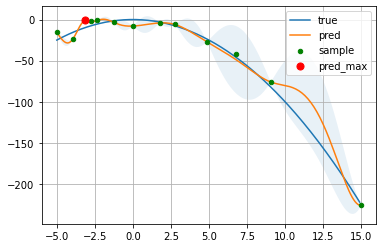

In [11]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import math
import numpy as np
from bayes_opt import BayesianOptimization
from matplotlib import pyplot as plt
import random
 
def f(x):
    print('x :', x)
    score = -x**2 + 10*random.uniform(-1,1)#float(input("Input y : "))
    print('y :', score)
    return score
 
def plot_bo(bo):
    # プロット範囲 (決め打ち)
    X = [x for x in np.arange(-5, 15, 0.1)]
 
    # 真の関数
    y = [-x**2 for x in X]
    plt.plot(X, y, label='true')
 
    # サンプル点
    #print(bo.res[0])
    xs = [bo.res[p]['params']['x'] for p in range(len(bo.res))]
    ys = [bo.res[p]['target'] for p in range(len(bo.res))]
    plt.scatter(xs, ys, c='green', s=20, zorder=10, label='sample')
 
    # 予測結果
    mean, sigma = bo._gp.predict(np.array(X).reshape(-1, 1), return_std=True)
    plt.plot(X, mean, label='pred')  # 推定した関数
    plt.fill_between(X, mean + sigma, mean - sigma, alpha=0.1)  # 標準偏差
 
    # 最大値
    max_x = bo.max['params']['x']
    max_y = bo.max['target']
    print('max = ', max_x, max_y)
    plt.scatter([max_x], [max_y], c='red', s=50, zorder=10, label='pred_max')
 
 
def main():
    # 探索するパラメータと範囲を決める
    pbounds = {
        'x': (-5, 15),
    }
 
    # 探索対象の関数と、探索するパラメータと範囲を渡す
    bo = BayesianOptimization(f=f, pbounds=pbounds)
    # 最大化する
    bo.maximize(init_points=3, n_iter=10)
 
    # 結果をグラフに描画する
    plot_bo(bo)
 
    # グラフを表示する
    plt.legend()
    plt.grid()
    plt.show()
    #アニメーション--------------
    ##plot_ani(bo)
 
 
if __name__ == '__main__':
    main()

In [18]:
import matplotlib.animation as animation

In [19]:
def plot_ani(bo):
    fig = plt.figure()
    ax = fig.add_subplot(111)
 
    X = [x for x in np.arange(-5, 15, 0.1)]
    # 真の関数
    y = [-x**2 for x in X]
    plt.plot(X, y, label='true')
 
    #最大値
    max_x = bo.max['params']['x']
    max_y = bo.max['target']
    print('max = ', max_x, max_y)
 
    # サンプル点
    xs = [bo.res[p]['params']['x'] for p in range(len(bo.res))]
    ys = [bo.res[p]['target'] for p in range(len(bo.res))]
 
    line, = ax.plot([], [], '.g', markersize=15)
 
    def init():
        line.set_data([], [])
        return line
 
    def animate(i):
        line.set_data(xs[i],ys[i])
        ax.scatter(xs[i], ys[i] , c='black', s=15)
        return line
 
    ani = animation.FuncAnimation(fig, animate, len(bo.res), interval=500)
 
    plt.show()
    ani.save("bayes_ani_2D.gif", writer='pillow')

|   iter    |  target   |     x     |
-------------------------------------
x : -1.1367824967866147
y : -9.012118231398523
| 1         | -9.012    | -1.137    |
x : 2.211026654752155
y : 1.5894446545790757
| 2         | 1.589     | 2.211     |
x : 0.7198304799346715
y : 4.740372712583598
| 3         | 4.74      | 0.7198    |
x : 1.3279018381946406
y : 2.519173945734095
| 4         | 2.519     | 1.328     |
x : 4.100578382105295
y : -7.044379345476729
| 5         | -7.044    | 4.101     |
x : 15.0
y : -225.15712847055767
| 6         | -225.2    | 15.0      |
x : -5.0
y : -25.880612587978305
| 7         | -25.88    | -5.0      |
x : 7.675964710509315
y : -68.23227023235968
| 8         | -68.23    | 7.676     |
x : 0.10969652267394302
y : -0.5942641986347278
| 9         | -0.5943   | 0.1097    |
x : -3.135957487885619
y : -19.225714984239985
| 10        | -19.23    | -3.136    |
x : 3.122249537465209
y : -18.843751727555873
| 11        | -18.84    | 3.122     |
x : 5.622843340018896
y : -

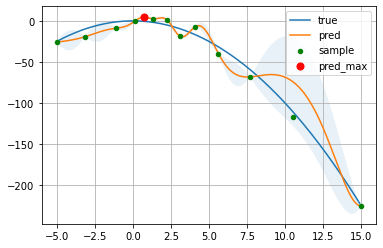

In [34]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import math
import numpy as np
from bayes_opt import BayesianOptimization
from matplotlib import pyplot as plt
import random
 
def f(x):
    print('x :', x)
    score = -x**2 + 10*random.uniform(-1,1)
    print('y :', score)
    return score
 
def plot_bo(bo):
    # プロット範囲 (決め打ち)
    X = [x for x in np.arange(-5, 15, 0.1)]
 
    # 真の関数
    y = [-x**2 for x in X]
    plt.plot(X, y, label='true')
 
    # サンプル点
    #print(bo.res[0])
    xs = [bo.res[p]['params']['x'] for p in range(len(bo.res))]
    ys = [bo.res[p]['target'] for p in range(len(bo.res))]
    plt.scatter(xs, ys, c='green', s=20, zorder=10, label='sample')
 
    # 予測結果
    mean, sigma = bo._gp.predict(np.array(X).reshape(-1, 1), return_std=True)
    plt.plot(X, mean, label='pred')  # 推定した関数
    plt.fill_between(X, mean + sigma, mean - sigma, alpha=0.1)  # 標準偏差
 
    # 最大値
    max_x = bo.max['params']['x']
    max_y = bo.max['target']
    print('max = ', max_x, max_y)
    plt.scatter([max_x], [max_y], c='red', s=50, zorder=10, label='pred_max')
 
 
def main():
    # 探索するパラメータと範囲を決める
    pbounds = {
        'x': (-5, 15),
    }
 
    # 探索対象の関数と、探索するパラメータと範囲を渡す
    bo = BayesianOptimization(f=f, pbounds=pbounds)
    # 最大化する
    bo.maximize(init_points=3, n_iter=10)
 
    # 結果をグラフに描画する
    plot_bo(bo)
 
    # グラフを表示する
    plt.legend()
    plt.grid()
    plt.show()
    #アニメーション--------------
    #plot_ani(bo) 
 
if __name__ == '__main__':
    main()

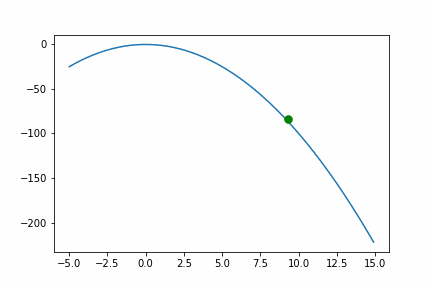

In [35]:
import IPython


out_filename = 'bayes_ani_2D.gif'
IPython.display.Image(out_filename, format='png')

|   iter    |  target   |    x1     |    x2     |
-------------------------------------------------
x1 : 1.186899494285088 x2 : -1.0467516696685095
y : -4.609631374241444
| 1         | -4.61     | 1.187     | -1.047    |
x1 : -2.106636771748822 x2 : 2.2283655396303885
y : -19.43245411973481
| 2         | -19.43    | -2.107    | 2.228     |
x1 : -2.365368368403759 x2 : 5.061315106705065
y : -82.53478114302193
| 3         | -82.53    | -2.365    | 5.061     |
x1 : 8.20404539019706 x2 : -3.130193483926231
y : -96.75684605531913
| 4         | -96.76    | 8.204     | -3.13     |
x1 : -2.1450302094704377 x2 : 5.620634699839531
y : -99.4375724211726
| 5         | -99.44    | -2.145    | 5.621     |
x1 : -1.7804970127205202 x2 : -1.3754898824599207
y : -8.850177947389078
| 6         | -8.85     | -1.78     | -1.375    |
x1 : 0.09061763299089926 x2 : -5.353041006767848
y : -86.03547431261994
| 7         | -86.04    | 0.09062   | -5.353    |
x1 : 1.1497556376087406 x2 : 1.4963066030711527
y : -8

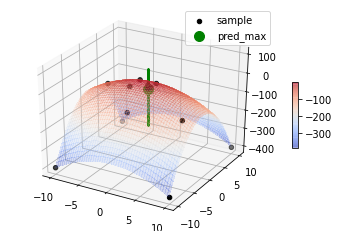

In [36]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import math
import numpy as np
from bayes_opt import BayesianOptimization
from matplotlib import pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
x1_max = 10
x1_min = -10
x2_max = 10
x2_min = -10
 
def f(x1, x2):
    print('x1 :', x1, 'x2 :', x2)
    score = - x1**2 - 3*x2**2 + random.uniform(-0.1,0.1)
    print('y :', score)
    return score
 
def plot_bo(bo):
    # プロット範囲 (決め打ち)
    X1 = [x1 for x1 in np.arange(x1_min, x1_max, 0.1)]
    X2 = [x2 for x2 in np.arange(x1_min, x2_max, 0.1)]
    X1, X2 = np.meshgrid(X1, X2)
 
    # 真の関数
    y = - X1**2 - 3*X2**2
    surf = ax.plot_surface(X1, X2, y, alpha=0.2, cmap=plt.cm.coolwarm,
                      linewidth=0, antialiased=False)
 
    # カラーバーの表示
    fig.colorbar(surf, shrink=0.3, aspect=10)
 
 
    # サンプル点
    print(bo.res[0])
    xs1 = [bo.res[p]['params']['x1'] for p in range(len(bo.res))]
    xs2 = [bo.res[p]['params']['x2'] for p in range(len(bo.res))]
    ys = [bo.res[p]['target'] for p in range(len(bo.res))]
    ax.scatter(xs1,xs2, ys, c='black', s=20, zorder=10, label='sample')
 
 
    # 最大値
    print(bo.max)
    max_x1 = bo.max['params']['x1']
    max_x2 = bo.max['params']['x2']
    max_y = bo.max['target']
    print('max = ', max_x1, max_x2, max_y)
    for y in range(-200, 100):
        ax.scatter([max_x1],[max_x2], y , c='green', s=1)
    ax.scatter([max_x1],[max_x2],[max_y], c='green', s=100, zorder=10, label='pred_max')
 
 
def plot_ani(bo):
    # プロット範囲 (決め打ち)
    X1 = [x1 for x1 in np.arange(x1_min, x1_max, 0.1)]
    X2 = [x2 for x2 in np.arange(x1_min, x2_max, 0.1)]
    X1, X2 = np.meshgrid(X1, X2)
    # 真の関数
    y = - X1**2 - 3*X2**2
    surf = ax.plot_surface(X1, X2, y, alpha=0.2, cmap=plt.cm.coolwarm,
                      linewidth=0, antialiased=False)
    #最大値
    max_x1 = bo.max['params']['x1']
    max_x2 = bo.max['params']['x2']
    max_y = bo.max['target']
    print('x_max = ', max_x1, max_x2,'max_y = ', max_y)
    for y in range(-400, 200):
        ax.scatter([max_x1],[max_x2], y , c='green', s=1)
    # サンプル点
    print(bo.res[0])
    xs1 = [bo.res[p]['params']['x1'] for p in range(len(bo.res))]
    xs2 = [bo.res[p]['params']['x2'] for p in range(len(bo.res))]
    ys = [bo.res[p]['target'] for p in range(len(bo.res))]
 
    line, = ax.plot([], [], '.g', markersize=15)
 
    def init():
        line.set_data([], [])
        return line
 
    def animate(i):
        line.set_data(xs1[i],xs2[i])
        line.set_3d_properties(ys[i])
        ax.scatter([xs1[i]],[xs2[i]], ys[i] , c='black', s=15)
        return line
 
    ani = animation.FuncAnimation(fig, animate, len(bo.res), interval=500)
 
    plt.show()
    ani.save("bayes_ani.gif", writer='pillow')
 
def main():
    # 探索するパラメータと範囲を決める
    pbounds = {'x1': (x1_min, x1_max), 'x2': (x2_min, x2_max)}
 
    # 探索対象の関数と、探索するパラメータと範囲を渡す
    bo = BayesianOptimization(f=f, pbounds=pbounds)
    # 最大化する
    bo.maximize(init_points=3, n_iter=10)
 
    print('OPTIMIZE: END')
 
    # 結果をグラフに描画する
    plot_bo(bo)
    # グラフを表示する
    plt.legend()
    plt.grid()
    plt.show()
 
    #plt.cla()
 
    #アニメーション--------------
    #plot_ani(bo)
 
 
if __name__ == '__main__':
    main()

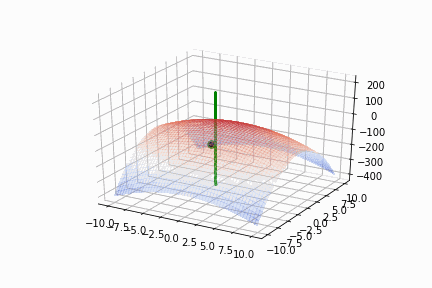

In [33]:
import IPython


out_filename = 'bayes_ani.gif'
IPython.display.Image(out_filename, format='png')